# Relatório Projeto ATP 2024/2025

## Sistema de Consulta e Análise de Publicações Científicas

---
##### Afonso Pires a107161
##### Andreia Cardoso a107279
##### Elsa Peixoto a107275

---

### Índice

1. **Introdução**  
   1.1. Resumo 

2. **Códigos**  
   2.1. Códigos usados para a personalização da interface
   <br>
   2.2. Código usado para a criação do menu 
   <br> 
   2.3. Códigos usados para as diferentes funcionalidades da aplicação
   <br>
   2.4. Códigos usados para a elaboração dos gráficos

3. **Como funciona a aplicação**  

4. **Exemplos de execução do sistema**    

5. **Conclusão**  
<br>
---

### 1. Introdução

Este documento apresenta uma descrição do desenvolvimento do projeto da edição 2024 da unidade curricular **"Algoritmos e Técnicas de Programação"**.

##### 1.1. Resumo 

Ao longo deste documento vai ser explicado o processo e os algoritmos usados para a criação de uma aplicação de consulta e análise de publicações científicas, que responde às necessidades de gestão e análise destas publicações. Sendo assim, no âmbito deste projeto foi desenvolvido um sistema em Python que permite criar, atualizar e analisar publicações científicas. Para isso, a aplicação utiliza um dataset de publicações, que serve de base para a realização de pesquisas detalhadas, usando filtros relevantes, tais como a data de publicação, as palavras-chave, autores, etc. Além disso, com o sistema concebido é ainda possível gerar relatórios, que mostram gráficos ilustrativos com estatísticas, detalhados para a análise de métricas dos artigos e dos seus autores.


<br><br>

### 2. Códigos
Para o desenvolvimento do nosso projeto, dividimos o trabalho em três documentos: um documento que contém o código relativo aos gráficos dos relatórios, um documento com o  código para as diferentes funcionalidades (funções) da aplicação e outro documento que gera a aplicação em si.
<br><br>

##### 2.1. Códigos usados para a personalização da interface

De modo a haver uma maior personalização da interface, escolhemos um certo tipo e tamanho da letra, cor da aplicação, a localização da mesma quando abre a janela, entre outros.

##### - Código da janela principal de quando se mete a aplicação a rodar:
```python
sg.theme("LightBrown10")

layout = [
    [sg.Text("Consulta e Análise de Publicações Científicas ", font=("Helvetica", 15), justification="center")],
    [sg.Button("Iniciar", size=(20,2),key="-INICIAR-"), sg.Button("Sair",size=(20,2), key="-SAIR-")]
]

window = sg.Window("Consulta e Análise de Publicações Científicas", layout, size=(435, 90), finalize=True) 
```
<br>

##### 2.2. Código usado para a criação do menu
Após se escolher entrar na aplicação, carregando no botão “Iniciar”, aparece o menu principal e para a criação desse menu associou-se um botão a cada uma das funcionalidades (funções) disponíveis da aplicação.

```python
lista_menu = [
            [sg.Text("Menu Principal", font=("Arial", 20), justification="center", expand_x=True)],
            [sg.Button("Carregar Base de Dados", key="-CARREGAR-")],
            [sg.Button("Help", key="-HELP-", disabled=True)],
            [sg.Button("Criar Publicação", key="-CRIARPUB-", disabled=True)],
            [sg.Button("Consulta de Publicação", key="-CONSULTADEPUB-", disabled=True)],
            [sg.Text("Consulta de Publicação Por:", key="-CONSULTA-"), 
             sg.Radio("Título", key="-CT-", group_id="consulta", disabled=True), sg.Radio("Data de publicação", key="-CD-", group_id="consulta", disabled=True), 
             sg.Radio("Afiliação", key="-CA-", group_id="consulta", disabled=True),sg.Radio("Autor", key="-CAU-", group_id="consulta", disabled=True), 
             sg.Radio("Palavra-Chave", key="-CP-", group_id="consulta", disabled=True), sg.Button("Consultar", key="-CONSULTAR-", disabled=True)],
            [sg.Button("Atualizar Publicação", key="-ATUALIZARPUB-",  disabled=True)],
            [sg.Button("Eliminar Publicação", key="-ELIMINARPUB-", disabled=True)],
            [sg.Button("Relatório de Estatísticas", key="-GERARREL-", disabled=True)],
            [sg.Button("Listar Autores", key="-LISTARAUTH-", disabled=True)],
            [sg.Button("Listar Palavras-Chave", key="-LISTARPC-", disabled=True)],
            [sg.Button("Importar Publicações", key="-IMPORTARPUB-", disabled=True)],
            [sg.Button("Guardar Publicações", key="-GUARDARPUB-", disabled=True)],
            [sg.Button("Exportar Última Pesquisa", key="-EXPORTAR-", disabled= True)],
            [sg.Button("Sair", key="-SAIR-")]
        ]

        window = sg.Window("Menu Principal", lista_menu, font=('Arial'), finalize=True)
```
<br>

##### 2.3. Códigos usados para as diferentes funcionalidades da aplicação:
Como referido anteriormente, a aplicação tem diversas funcionalidades que se apresentam no menu principal e para isso desenvolvemos diferentes códigos que permitem que haja um sistema operacional e eficiente, após ser carregada uma base de dados de publicações.
##### - Exemplo de código de uma das funcionalidades da aplicação (Eliminar publicação por DOI):
```python
def eliminarPub(dataset, fnome):
    with open(fnome, "r", encoding="utf-8") as fIn:
        publicacoes = json.load(fIn)

    # Layout inicial para inserção do DOI
    doi_layout = [
        [sg.Text("Insira o DOI da publicação que deseja remover:")],
        [sg.InputText(key="-DOI-", size=(50, 1))],
        [sg.Button("Confirmar", key="-CONFIRMAR-"), sg.Button("Cancelar", key="-CANCELAR-")]
    ]
    doi_window = sg.Window("Remover Publicação por DOI", doi_layout, font=("Helvetica", 15))

    stop = False
    while not stop:
        event, values = doi_window.read()

        if event in (sg.WINDOW_CLOSED, "-CANCELAR-"):
            stop = True  # Fecha a janela se o evento for cancelar ou fechamento
            doi_window.close()
            return dataset  # Retorna o dataset sem alterações

        if event == "-CONFIRMAR-":
            doi_input = values["-DOI-"].strip()  # Obtém o DOI inserido pelo usuário

            if not doi_input:
                sg.popup("Por favor, insira um DOI válido.", font=("Helvetica", 15))
            else:
                # Verifica se o DOI existe no dataset
                publicacao_encontrada = None
                for i, pub in enumerate(dataset):
                    if pub.get("doi") == doi_input:
                        publicacao_encontrada = i  # Salva o índice da publicação encontrada

                if publicacao_encontrada is not None:
                    # Confirmação de remoção
                    resposta = sg.popup_yes_no(
                        f"Tem a certeza que deseja remover a publicação com DOI: {doi_input}?",
                        font=("Helvetica", 15)
                    )
                    if resposta == "Yes":
                        dataset.pop(publicacao_encontrada)  # Remove a publicação
                        sg.popup(f"Publicação com DOI: {doi_input} foi removida com sucesso.", font=("Helvetica", 15))
                        stop = True  # Sai do loop após remoção
                else:
                    sg.popup("DOI não encontrado no dataset. Tente novamente.", font=("Helvetica", 15))

    # Salvar o dataset atualizado no arquivo
    fOut = open(fnome, "w", encoding='utf-8')
    json.dump(dataset, fOut, ensure_ascii=False, indent=4)
    fOut.close()

    doi_window.close()
    return dataset

```
<br>

#####  2.4. Códigos usados para a elaboração dos gráficos:
Para elaborar os códigos dos gráficos, foi utilizado o material facultado durante as aulas da UC, de modo a que fosse possível desenvolver diferentes relatórios que relacionem os dados.

##### - Código que mostra as diferentes opções de gráfico que é possível gerar:
```python
def exibir_menu_relatorios(publicacoes):
    sg.theme("DarkTeal4")
    layout_relatorios = [
        [sg.Text("Escolha um Relatório para Gerar", font=("Arial", 14), justification="center")],
        [sg.Button("Distribuição de Publicações por Ano", key="-REL_ANO-")],
        [sg.Button("Distribuição de Publicações por Mês de um Ano", key="-REL_MES_ANO-")],
        [sg.Button("Número de Publicações por Autor (Top 20)", key="-REL_AUTOR-")],
        [sg.Button("Distribuição de Publicações por Autor por Ano", key="-REL_AUTOR_ANO-")],
        [sg.Button("Distribuição de Palavras-chave por Frequência", key="-REL_PALAVRAS-")],
        [sg.Button("Distribuição de Palavras-chave por Ano", key="-REL_PALAVRAS_ANO-")],
        [sg.Button("Fechar", key="-FECHARREL-")]
    ]
    
    window_relatorios = sg.Window("Relatórios de Estatísticas", layout_relatorios, font=("Arial"), finalize=True)

```
Este código faz com que apareça uma janela deste tipo:
<br>
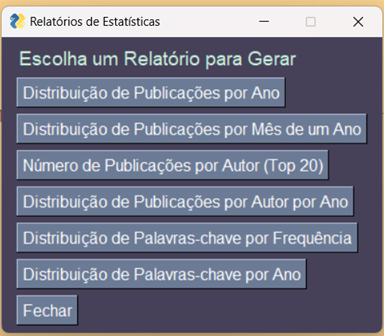


Como exemplo, a seguir apresenta-se o código do gráfico da distribuição de publicações por ano:
```python
def distribucao_por_ano(dataset):
    anos = []
    for pub in dataset:
        if 'publish_date' in pub and pub['publish_date']:
            # Limpa a string de data, removendo qualquer texto adiconal
            data_pub = pub['publish_date'].split(" —")[0]  # pegar só na parte da data
            
            if len(data_pub) == 10:     # Verificar se a data tem o formato correto "YYYY-MM-DD"
                try:
                    ano = datetime.strptime(data_pub, "%Y-%m-%d").year
                    anos.append(ano)
                except ValueError:
                    print(f"A data '{data_pub}' não pode ser convertida para o formato esperado.")
            else:
                print(f"A data '{pub['publish_date']}' não tem o formato esperado.")  # Apenas imprime a data inválida
        else:
            print(f"A publicação não tem o campo 'publish_date'.")  # Caso não exista 'publish_date'
    
    if anos:
        contagem_anos = Counter(anos)
    
        plt.figure(figsize=(10, 6))
        plt.bar(contagem_anos.keys(), contagem_anos.values())
        plt.title("Distribuição de Publicações por Ano")
        plt.xlabel("Ano")
        plt.ylabel("Número de Publicações")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Nenhuma publicação com data válida encontrada.")
```
Este é o gráfico que a função anterior gera:
<br>
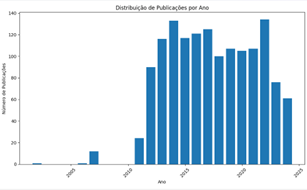

<br><br>

### 3. Como funciona a aplicação

Ao rodar o sistema, primeiro o utilizador vai ter de decidir se quer iniciar a aplicação ou sair. Caso escolha a opção “Iniciar”, vai ser apresentado o Menu Principal, caso escolha a opção “Sair”, a aplicação fecha.
<br>
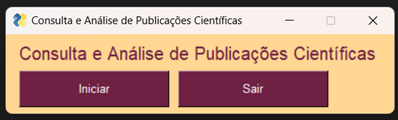


Ao iniciar a aplicação, o utilizador tem obrigatoriamente de carregar uma base de dados para que esta fique operacional e seja possível utilizar as diversas funcionalidades que apresenta.
Após ser carregada esta base de dados num formato desejado, é possível navegar pela aplicação e terá disponível todas as funcionalidades apresentadas no menu, às quais se pode aceder na ordem que desejar.
<br>
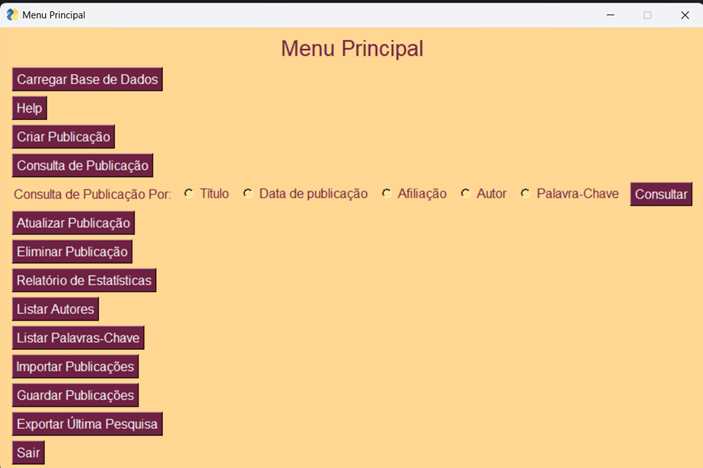

O Menu Principal apresenta os seguintes botões:

- **Help**
  Este botão serve para imprimir uma mensagem de ajuda com os restantes comandos disponíveis e um pequeno resumo de para que servem.
<br>
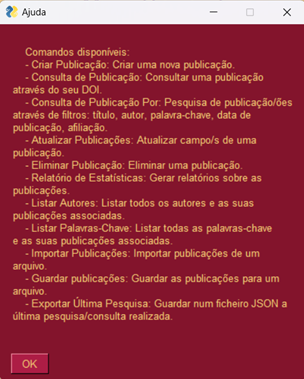

- **Criar Publicação**
  Ao carregar neste botão, aparece uma nova janela em que é possível criar uma nova publicação que vai permitir escrever o novo título, o resumo, as palavras-chave (separadas por virgulas), o DOI, o URL do PDF, a data de publicação, o URL do artigo, os autores (nome e afiliação). Após preenchidos os campos pretendidos, podemos guardar a nova publicação e ela fica criada. É de notar que o único campo de preenchimento obrigatório é o DOI, sendo possível criar uma nova publicação em que os restantes campos não estejam preenchidos.
  <br>
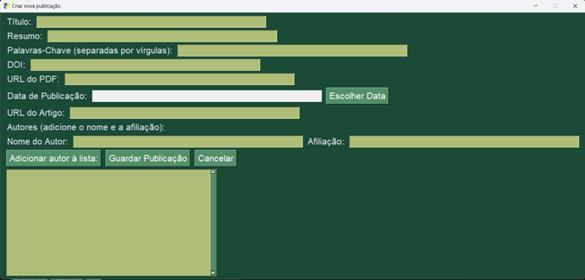

- **Consulta de publicação**
  Pressionando este botão, aparece uma janela que pede para introduzir o DOI da publicação que deseja consultar. Após ser introduzido esse identificador da publicação, o sistema permite a consulta da informação detalhada dessa publicação.
  -É ainda possível consultar publicações através de outros parâmetros e para isso, em baixo do botão “Consulta de Publicação”, se quisermos consultar por título, data de publicação, afiliação, autor ou palavra-chave, apenas é necessário escolher o filtro desejado. Após a escolha do critério, o sistema lista todas as publicações presentes na base de dados com o filtro pretendido.


- **Eliminar Publicação**  
  Pressionando este botão, aparece uma janela que pede para introduzir o DOI da publicação que deseja eliminar. Após introduzido esse identificador da publicação, o sistema elimina a publicação correspondente.  

- **Relatório de Estatísticas**  
  Ao carregar neste botão, aparece uma nova janela em que aparecem as diversas opções de relatório que é possível gerar. O utilizador pode escolher qual quer gerar e o sistema apresenta o gráfico correspondente. Os gráficos podem ser de:  
  - Distribuição de publicações por ano.  
  - Distribuição de publicações por mês de um determinado ano.  
  - Número de publicações por autor (top 20 autores).  
  - Distribuição de publicações de um autor por anos.  
  - Distribuição de palavras-chave pela sua frequência (top 20 palavras-chave).  
  - Distribuição de palavras-chave mais frequentes por ano.  

- **Listar Autores**  
  Ao carregar neste botão, aparece uma nova janela que permite ao utilizador escolher se quer listar as publicações de um autor por frequência de publicações ou por ordem alfabética. Depois, o sistema lista os autores e as suas publicações, de acordo com o critério escolhido.  

- **Listar Palavras-Chave**  
  Ao carregar neste botão, aparece uma nova janela que permite ao utilizador escolher se quer listar as palavras-chave por número de ocorrências ou por ordem alfabética. Depois, o sistema lista as palavras-chave e as publicações associadas a cada uma, de acordo com o critério escolhido.  

- **Importar Publicações**  
  Este botão permite importar publicações de um arquivo.  

- **Guardar Publicações**  
  Este botão permite guardar as publicações para um arquivo.  

- **Exportar Última Pesquisa**  
  Este botão permite guardar num ficheiro JSON a última pesquisa/consulta realizada.  

- **Sair**  
  Este botão permite sair da aplicação.  

<br><br>


### 4. Exemplos de execução do sistema
De forma a mostrar o funcionamento da aplicação, apresentam-se em seguida algumas imagens que mostram exemplos de execução do sistema de alguns paramêtros.
    Após a aplicação ser aberta e ser mostrado o Menu Principal (já mostrado anteriormente), e após ser carregado o dataset, se selecionarmos o botão **Consultar publicação** aparece esta nova janela:
<br>
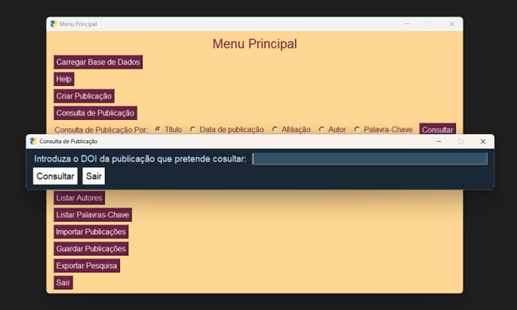

<br>
De seguida, insere-se o DOI da publicação e obtém-se a informação da publicação correspondente:
<br>

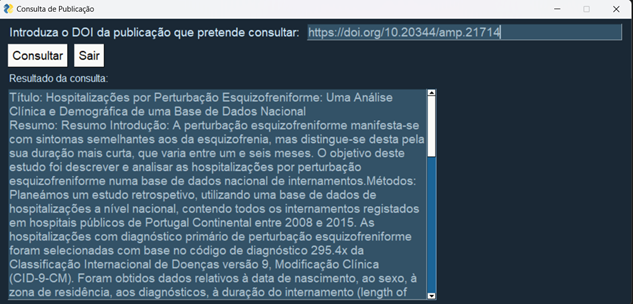

<br>

Como outro exemplo de funcionamento do sistema, se selecionarmos o botão **Listar Autores** aparece esta nova janela, com as opções de escolher a listagem por frequência de publicações ou por ordem alfabética:
<br>
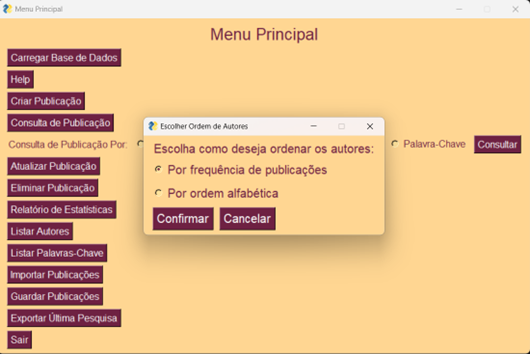


Após ser selecionado o critério de frequência de publicações, o resultado é o seguinte:
<br>
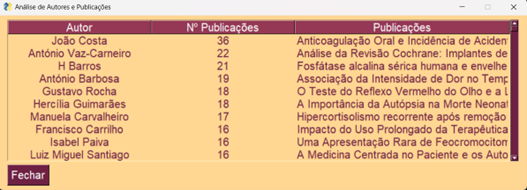


<br><br>

### 5. Conclusão
Através da aplicação prática dos conhecimentos adquiridos ao longo da UC foi possível desenvolver uma aplicação funcional para a consulta e análise de publicações científicas.
A realização deste projeto contribuiu para um entendimento mais profundo de uma das possíveis áreas de atuação profissional dentro do curso de Engenharia Biomédica: a Informática Médica. Essa área destaca-se pela sua relevância crescente no mercado, ao unir os campos da tecnologia da informação e da saúde, oferecendo soluções inovadoras para problemas médicos e científicos. Ao explorar essa vertente, foi possível reconhecer o seu potencial para transformar práticas clínicas e de investigação, mostrando como a aplicação de conhecimentos de programação e análise de dados pode ser útil na área da saúde.
Em suma, este projeto não só reforçou competências técnicas, como também ampliou horizontes sobre possíveis trajetórias futuras.
